#**Classificação de amostras de vinho** <br>


<b>Resumo:</b>

O objetivo analisar os atributos do dataset California <br>

<b>Data set URL : </b>

https://scikit-learn.org/stable/datasets/real_world.html#california-housing-dataset


<b>Descrição:</b>

Este projeto é realizado para  a disciplina Tópicos Especiais em Computação I (Introdução à Ciência de Dados).

<b>Número de Instâncias:</b>

20640

<b>Atributos:</b>
Renda mediana da MedInc no grupo de blocos

HouseAge idade média da casa no grupo de quarteirões

AveRooms número médio de quartos por família

AveBedrms número médio de quartos por família

População do grupo de blocos populacionais

AveOccup número médio de membros da família

Latitude do grupo de blocos de latitude

Longitude do grupo de blocos de longitude




## <b>Importando Bibliotecas

In [10]:
import pandas as pd               
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from cycler import cycler
from scipy.stats.mstats import gmean,hmean
from scipy import stats
import math
from scipy.stats import kurtosis, skew
%matplotlib inline

## <b>Carregando a Base de Dados


In [11]:
# carregando dataset California Housing
from sklearn.datasets import fetch_california_housing
dataCalifornia = fetch_california_housing()


In [12]:
print(dataCalifornia['DESCR'])

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

Os 178 pontos de dados em cada um dos 13 grupos de dados, formatados como uma matriz de 150x13

In [13]:
print(dataCalifornia['data'][:2])


[[ 8.32520000e+00  4.10000000e+01  6.98412698e+00  1.02380952e+00
   3.22000000e+02  2.55555556e+00  3.78800000e+01 -1.22230000e+02]
 [ 8.30140000e+00  2.10000000e+01  6.23813708e+00  9.71880492e-01
   2.40100000e+03  2.10984183e+00  3.78600000e+01 -1.22220000e+02]]


Em qual grupo cada ponto de dados está (0, 1 ou 2)

In [14]:
print(dataCalifornia['target'])

[4.526 3.585 3.521 ... 0.923 0.847 0.894]


 Convertendo dados em um quadro de dados

In [15]:
data = pd.DataFrame(dataCalifornia['data'], columns=dataCalifornia['feature_names'])

In [16]:
target = pd.DataFrame(dataCalifornia['target'], columns=['ValorMedCasaCalifornia'])

In [17]:
df = pd.concat([target, data], axis='columns')

# **Exploração de dados**

Plot

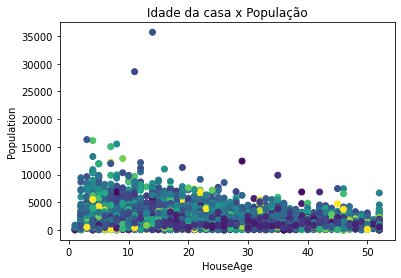

In [27]:
plt.scatter(df['HouseAge'], df['Population'], c=df['ValorMedCasaCalifornia'])
plt.title('Idade da casa x População')
plt.xlabel('HouseAge')
plt.ylabel('Population')
plt.show()

In [19]:
df.head(10)

,ValorMedCasaCalifornia,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,4.526,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,3.585,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,3.521,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,3.413,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.422,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
5,2.697,4.0368,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25
6,2.992,3.6591,52.0,4.931907,0.951362,1094.0,2.128405,37.84,-122.25
7,2.414,3.1200,52.0,4.797527,1.061824,1157.0,1.788253,37.84,-122.25
8,2.267,2.0804,42.0,4.294118,1.117647,1206.0,2.026891,37.84,-122.26
9,2.611,3.6912,52.0,4.970588,0.990196,1551.0,2.172269,37.84,-122.25


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ValorMedCasaCalifornia  20640 non-null  float64
 1   MedInc                  20640 non-null  float64
 2   HouseAge                20640 non-null  float64
 3   AveRooms                20640 non-null  float64
 4   AveBedrms               20640 non-null  float64
 5   Population              20640 non-null  float64
 6   AveOccup                20640 non-null  float64
 7   Latitude                20640 non-null  float64
 8   Longitude               20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ValorMedCasaCalifornia  20640 non-null  float64
 1   MedInc                  20640 non-null  float64
 2   HouseAge                20640 non-null  float64
 3   AveRooms                20640 non-null  float64
 4   AveBedrms               20640 non-null  float64
 5   Population              20640 non-null  float64
 6   AveOccup                20640 non-null  float64
 7   Latitude                20640 non-null  float64
 8   Longitude               20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [22]:
df.describe

<bound method NDFrame.describe of        ValorMedCasaCalifornia  MedInc  HouseAge  AveRooms  AveBedrms  \
0                       4.526  8.3252      41.0  6.984127   1.023810   
1                       3.585  8.3014      21.0  6.238137   0.971880   
2                       3.521  7.2574      52.0  8.288136   1.073446   
3                       3.413  5.6431      52.0  5.817352   1.073059   
4                       3.422  3.8462      52.0  6.281853   1.081081   
...                       ...     ...       ...       ...        ...   
20635                   0.781  1.5603      25.0  5.045455   1.133333   
20636                   0.771  2.5568      18.0  6.114035   1.315789   
20637                   0.923  1.7000      17.0  5.205543   1.120092   
20638                   0.847  1.8672      18.0  5.329513   1.171920   
20639                   0.894  2.3886      16.0  5.254717   1.162264   

       Population  AveOccup  Latitude  Longitude  
0           322.0  2.555556     37.88    -122.23  

## <b>Verificar Valores nulos

In [23]:
data.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
dtype: int64

Esta função conta as colunas que contêm valor nulo, mas aqui parece que os dados são pré-processados ​​e limpos com valores nulos.

## **Informações estatísticas para conjunto de dados**

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


In [25]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
MedInc,20640.0,3.870671,1.899822,0.499900,2.563400,3.534800,4.743250,15.000100
HouseAge,20640.0,28.639486,12.585558,1.000000,18.000000,29.000000,37.000000,52.000000
AveRooms,20640.0,5.429000,2.474173,0.846154,4.440716,5.229129,6.052381,141.909091
AveBedrms,20640.0,1.096675,0.473911,0.333333,1.006079,1.048780,1.099526,34.066667
Population,20640.0,1425.476744,1132.462122,3.000000,787.000000,1166.000000,1725.000000,35682.000000
AveOccup,20640.0,3.070655,10.386050,0.692308,2.429741,2.818116,3.282261,1243.333333
Latitude,20640.0,35.631861,2.135952,32.540000,33.930000,34.260000,37.710000,41.950000
Longitude,20640.0,-119.569704,2.003532,-124.350000,-121.800000,-118.490000,-118.010000,-114.310000


<li> O resumo do conjunto de dados dataWine = data parece correto, no primeiro momento não parecem ocorrer anormalidades nos dados(valores inválidos/negativos).<li> Todos os dados parecem estar dentro do intervalo(com escalas diferentes, o que precisa de padronização).

##**Aprendendo sobre o atributo** ***HouseAge***

Transformando os dados para o formato numérico

In [28]:
df['HouseAge']=pd.to_numeric(df['HouseAge'],errors='coerce')

In [29]:
data.HouseAge.value_counts().sort_index()

1.0        4
2.0       58
3.0       62
4.0      191
5.0      244
6.0      160
7.0      175
8.0      206
9.0      205
10.0     264
11.0     254
12.0     238
13.0     302
14.0     412
15.0     512
16.0     771
17.0     698
18.0     570
19.0     502
20.0     465
21.0     446
22.0     399
23.0     448
24.0     478
25.0     566
26.0     619
27.0     488
28.0     471
29.0     461
30.0     476
31.0     458
32.0     565
33.0     615
34.0     689
35.0     824
36.0     862
37.0     537
38.0     394
39.0     369
40.0     304
41.0     296
42.0     368
43.0     353
44.0     356
45.0     294
46.0     245
47.0     198
48.0     177
49.0     134
50.0     136
51.0      48
52.0    1273
Name: HouseAge, dtype: int64

Gráfico de barras do atributo HouseAge das 25 primeiras amostras

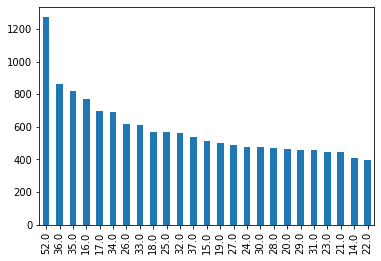

In [30]:
data['HouseAge'].value_counts().head(25).plot.bar()

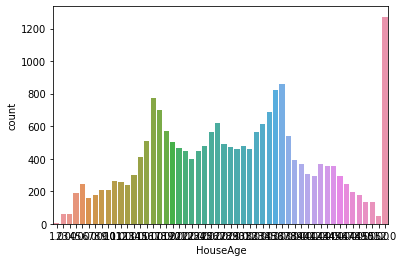

In [31]:
sns.countplot(x='HouseAge', data=data)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


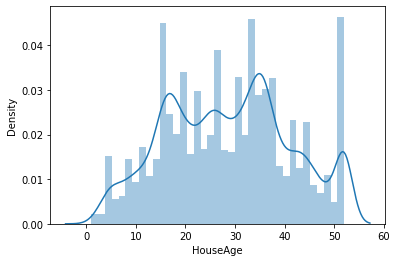

In [32]:
sns.distplot(data['HouseAge'])

O Countplot é um gráfico em formato de barra, onde “x” é o atributo escolhido, e “y” é a quantidade de vezes que esse atributo aparece.

Text(0.5, 1.0, 'As 30 medidas mais frequentes do atributo HouseAge')

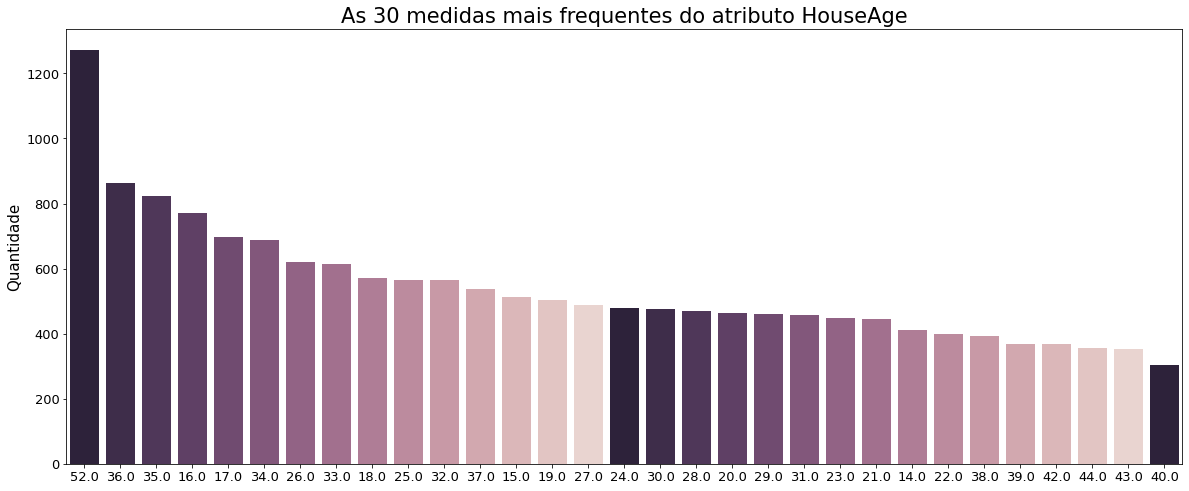

In [33]:
palette_genre_cubehelix = sns.cubehelix_palette(15,reverse=True)
fig = plt.figure(figsize=(20,8))
sns.countplot(x=data['HouseAge'], order = data['HouseAge'].value_counts().index ,palette=palette_genre_cubehelix,data=data)
plt.xlim(-0.5,30.5)
plt.xlabel('')
plt.ylabel('Quantidade',fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.title('As 30 medidas mais frequentes do atributo HouseAge',fontsize=21)

Calculando a média aritmética

In [34]:
df["HouseAge"].mean()

28.639486434108527

In [35]:
HOUSEAGE = df["HouseAge"]

In [37]:
HOUSEAGE.mean()

28.639486434108527

Média geométrica

In [38]:
gmean(HOUSEAGE)

25.15696336552169

Média Harmônica

In [39]:
hmean(HOUSEAGE)

20.38180106154972

Mediana

In [40]:
HOUSEAGE.median()

29.0

Moda

In [41]:
HOUSEAGE.mode()

0    52.0
dtype: float64

*Variância*

In [42]:
HOUSEAGE.var()

158.39626040778117

Desvio padrão

In [43]:
HOUSEAGE.std()

12.585557612111637

Valor máximo

In [44]:
HOUSEAGE.max()

52.0

Valor mínimo

In [45]:
HOUSEAGE.min()

1.0

MEDIDAS DE ASSIMETRIA

Função para calcular estatísticas

In [46]:
def calcula_estatisticas(data):
  mean = round(np.mean(data),2)
  mode = round(stats.mode(data,)[0][0],2)
  median = round(np.median(data),2)
  var = round(np.var(data),2)
  std = round(np.std(data),2)
  coef_pearson = round(stats.skew(data),2)
  coef_kurtosis = round(kurtosis(data),2)
  msg = print("Media: {}\nModa: {}\nMediana: {}\nVariância: {}\nDesvio Padrão: {}\nCoeficiente Person: {}\nCoeficiente de Kurtosi: {}".format(mean,median,mode,var,std,coef_pearson,coef_kurtosis))
  return msg

In [48]:
so = df["HouseAge"]

In [49]:
calcula_estatisticas(so)

Media: 28.64
Moda: 29.0
Mediana: 52.0
Variância: 158.39
Desvio Padrão: 12.59
Coeficiente Person: 0.06
Coeficiente de Kurtosi: -0.8


Como nesse caso a média, a moda e a mediana tem valores bem próximos, temos uma  Distribuição  quase Simétrica.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


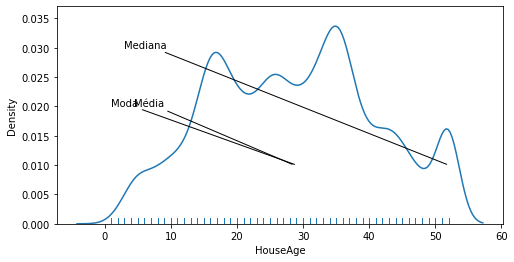

In [50]:
fig = plt.figure(figsize=(8, 4))
ax = sns.distplot(so,rug=True,kde=True,hist=False)

ax.annotate('Moda', xy=(29.0,0.01), xytext=(1, 0.02),arrowprops={'arrowstyle': '-'})         
ax.annotate('Mediana', xy=(52.0, 0.01), xytext=(3, 0.03),arrowprops={'arrowstyle': '-'})
ax.annotate('Média', xy=(28.64, 0.01), xytext=(4.5, 0.02),arrowprops={'arrowstyle': '-'})
plt.show()

Asimétrica negativa / à esquerda - Média < Moda < Mediana

Coeficiente de Pearson - O valor é próximo de zero a distribuição é simétrica.

Coeficiente de Curtose - O valor é menor que 3 o grau de achatamento da distribuição normal é platicúrtica (mais achatada no platô)

Correlação entre diferentes recursos usando o mapa de correlação

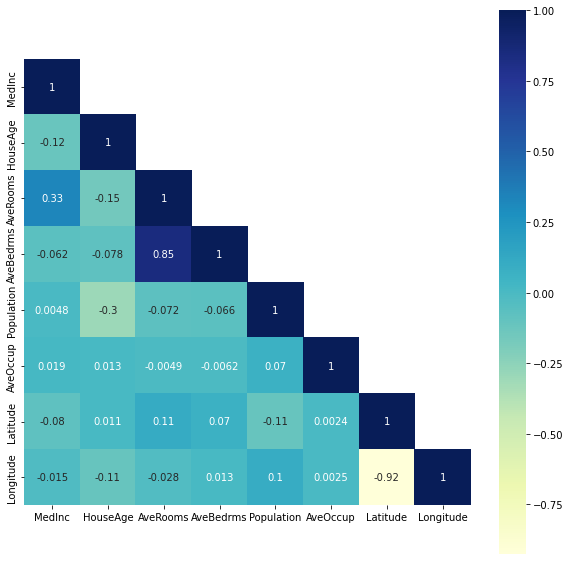

In [51]:
correlation= data.corr()
mask = np.array(correlation)
mask[np.tril_indices_from(mask)] = False
fig=plt.gcf()
fig.set_size_inches(10,10)
sns.heatmap(data=correlation,mask=mask,square=True,annot=True,cbar=True,cmap="YlGnBu")

In [53]:
correlation['HouseAge'].sort_values(ascending=False)

HouseAge      1.000000
AveOccup      0.013191
Latitude      0.011173
AveBedrms    -0.077747
Longitude    -0.108197
MedInc       -0.119034
AveRooms     -0.153277
Population   -0.296244
Name: HouseAge, dtype: float64

Fatores que mais afetam  o atributo idade da casa (HouseAge): MedInc e AveRooms
Fatores que afetam menos o atributo idade da casa (HouseAge): Population

##**Aprendendo sobre o atributo** ***Population***

*   Item da lista
*   Item da lista



Transformando os dados para o formato numérico

In [54]:
df['Population']=pd.to_numeric(df['Population'],errors='coerce')

In [56]:
data.Population.value_counts().sort_index()

3.0        1
5.0        1
6.0        1
8.0        4
9.0        2
          ..
15507.0    1
16122.0    1
16305.0    1
28566.0    1
35682.0    1
Name: Population, Length: 3888, dtype: int64

Gráfico de barras do atributo ash das 25 primeiras amostras

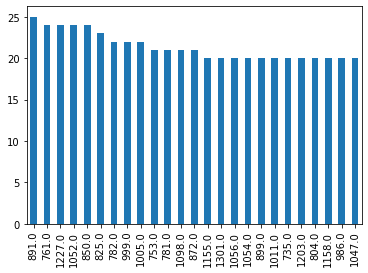

In [57]:
data['Population'].value_counts().head(25).plot.bar()

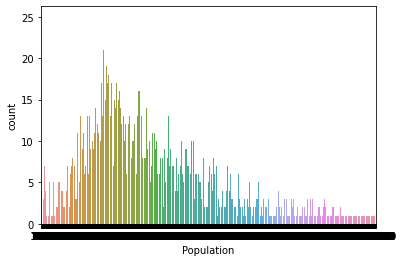

In [58]:
sns.countplot(x='Population', data=data)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


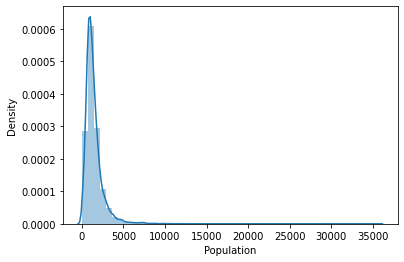

In [59]:
sns.distplot(data['Population'])

O Countplot é um gráfico em formato de barra, onde “x” é o atributo escolhido, e “y” é a quantidade de vezes que esse atributo aparece.

Text(0.5, 1.0, 'As 30 medidas mais frequentes do atributo Population')

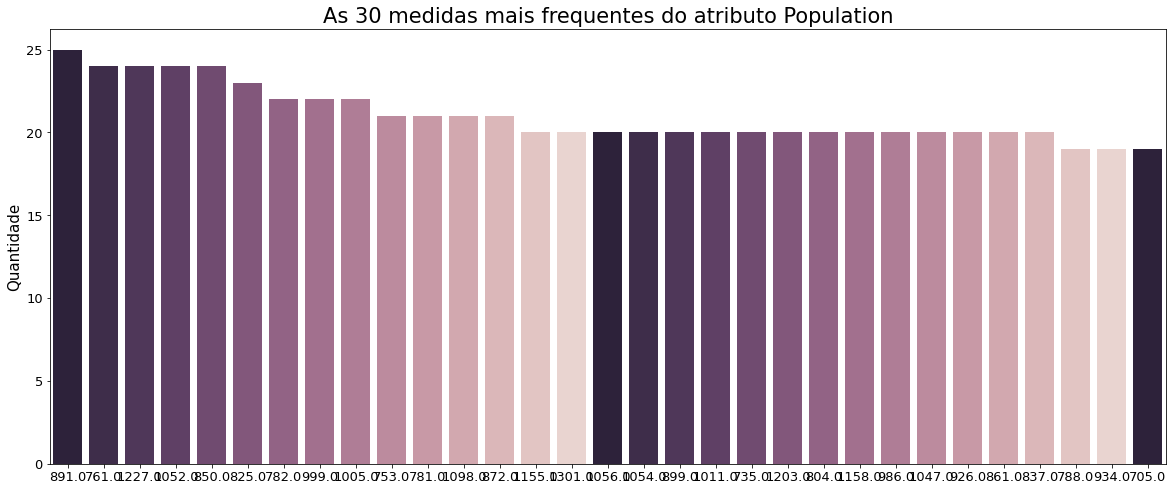

In [60]:
palette_genre_cubehelix = sns.cubehelix_palette(15,reverse=True)
fig = plt.figure(figsize=(20,8))
sns.countplot(x=data['Population'], order = data['Population'].value_counts().index ,palette=palette_genre_cubehelix,data=data)
plt.xlim(-0.5,30.5)
plt.xlabel('')
plt.ylabel('Quantidade',fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.title('As 30 medidas mais frequentes do atributo Population',fontsize=21)

Calculando a média aritmética

In [61]:
df["Population"].mean()

1425.4767441860465

In [62]:
POPULATION = df["Population"]

In [63]:
POPULATION.mean()

1425.4767441860465

Média geométrica

In [64]:
gmean(POPULATION)

1123.4007494496084

Média Harmônica

In [65]:
hmean(POPULATION)

715.4096149957797

Mediana

In [66]:
POPULATION.median()

1166.0

Moda

In [67]:
POPULATION.mode()

0    891.0
dtype: float64

*Variância*

In [68]:
POPULATION.var()

1282470.4572332504

Desvio padrão

In [69]:
POPULATION.std()

1132.4621217653375

Valor máximo

In [70]:
POPULATION.max()

35682.0

Valor mínimo

In [71]:
POPULATION.min()

3.0

MEDIDAS DE ASSIMETRIA

Função para calcular estatísticas

In [72]:
def calcula_estatisticas(data):
  mean = round(np.mean(data),2)
  mode = round(stats.mode(data,)[0][0],2)
  median = round(np.median(data),2)
  var = round(np.var(data),2)
  std = round(np.std(data),2)
  coef_pearson = round(stats.skew(data),2)
  coef_kurtosis = round(kurtosis(data),2)
  msg = print("Media: {}\nModa: {}\nMediana: {}\nVariância: {}\nDesvio Padrão: {}\nCoeficiente Person: {}\nCoeficiente de Kurtosi: {}".format(mean,median,mode,var,std,coef_pearson,coef_kurtosis))
  return msg

In [73]:
s1 = df["Population"]

In [74]:
calcula_estatisticas(s1)

Media: 1425.48
Moda: 1166.0
Mediana: 891.0
Variância: 1282408.32
Desvio Padrão: 1132.43
Coeficiente Person: 4.94
Coeficiente de Kurtosi: 73.54


Como nesse caso a média, a moda e a mediana tem valores bem próximos, temos uma  Distribuição  quase Simétrica.

In [ ]:
fig = plt.figure(figsize=(16, 8))
ax = sns.distplot(so,rug=True,kde=True,hist=False)

ax.annotate('Moda', xy=(1166,100), xytext=(100, 100),arrowprops={'arrowstyle': '-'})         
ax.annotate('Mediana', xy=(891, 100), xytext=(300, 100),arrowprops={'arrowstyle': '-'})
ax.annotate('Média', xy=(1425, 100), xytext=(450, 100),arrowprops={'arrowstyle': '-'})
plt.show()


Coeficiente de Pearson - O valor é próximo de zero a distribuição é simétrica.

Coeficiente de Curtose - O valor é menor que 3 o grau de achatamento da distribuição normal é platicúrtica (mais achatada no platô)

In [78]:
correlation['Population'].sort_values(ascending=False)

Population    1.000000
Longitude     0.099773
AveOccup      0.069863
MedInc        0.004834
AveBedrms    -0.066197
AveRooms     -0.072213
Latitude     -0.108785
HouseAge     -0.296244
Name: Population, dtype: float64